In [1]:
import matplotlib.pyplot as plt
from pylab import rcParams

from functions import *


# Set figure size for plots
rcParams['figure.figsize'] = 25, 5

In [2]:
# Parameters
n = 4  # Length of each time series
num_series = 32  # Number of time series to generate
number_of_clusters = 16

In [3]:
# Generate random time series data
time_series_data = np.random.randn(num_series, n)

In [4]:
# Define the desired scaling range (-1, 1)
new_min = -1
new_max = 1

# Create an empty array to store the scaled time series data
time_series_scaled_data = np.empty_like(time_series_data)

# Perform Min-Max scaling for each row (trajectory) individually
for i in range(num_series):
	min_value = np.min(time_series_data[i, :])
	max_value = np.max(time_series_data[i, :])
	time_series_scaled_data[i, :] = ((time_series_data[i, :] - min_value) / (max_value - min_value)) * (new_max - new_min) + new_min

# Dynamic Time Warping (DTW)

In [5]:
distance_matrix, time_series_indices = compute_dtw_distance_matrix(time_series_scaled_data)

In [6]:
# Compute DTW distance matrix and obtain merged time series indices
distance_matrix, time_series_indices = compute_dtw_distance_matrix(time_series_scaled_data)

In [7]:
time_series_indices_result = merge_time_series(distance_matrix, time_series_indices, number_of_clusters, aggregation='min')
time_series_indices_result = flatten_indices(time_series_indices_result)

Merging Process: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 7993.91it/s]


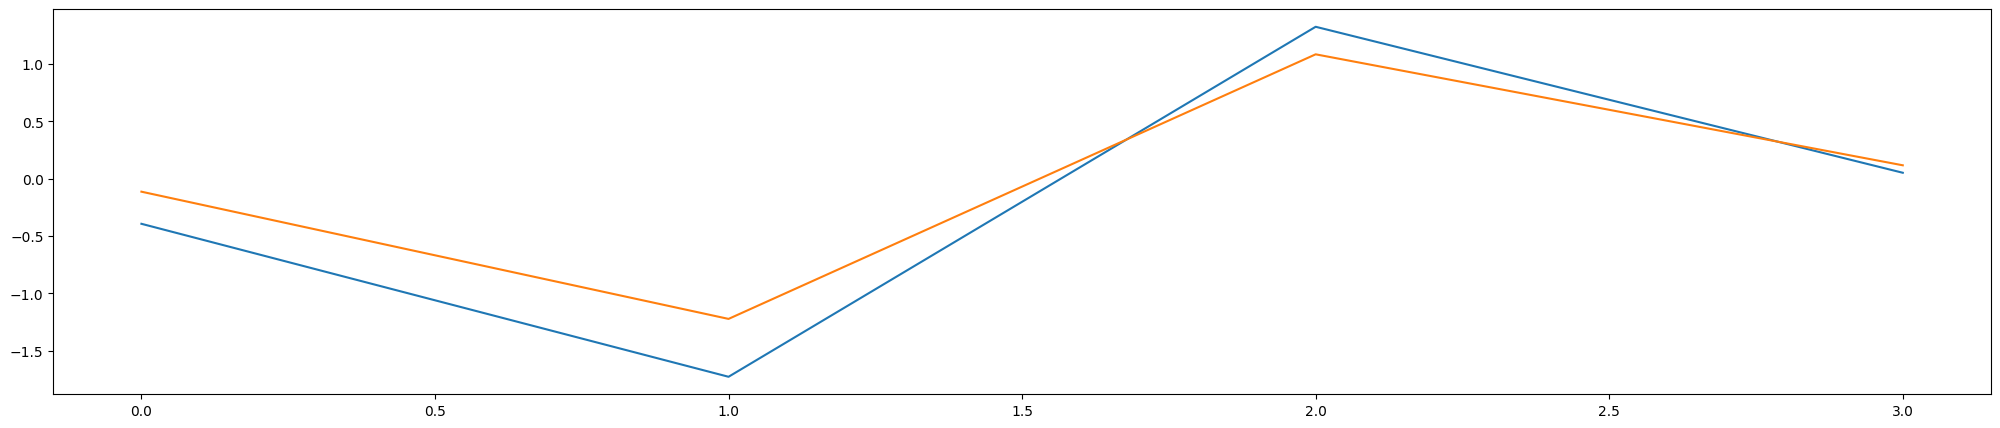

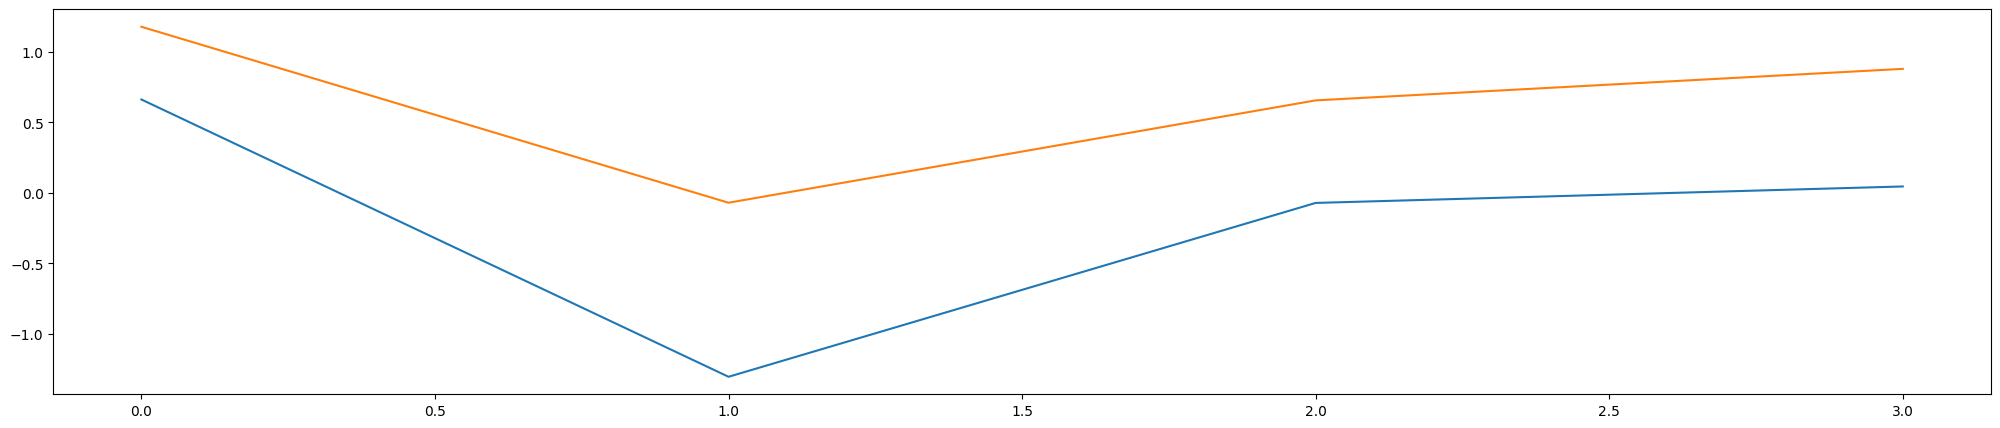

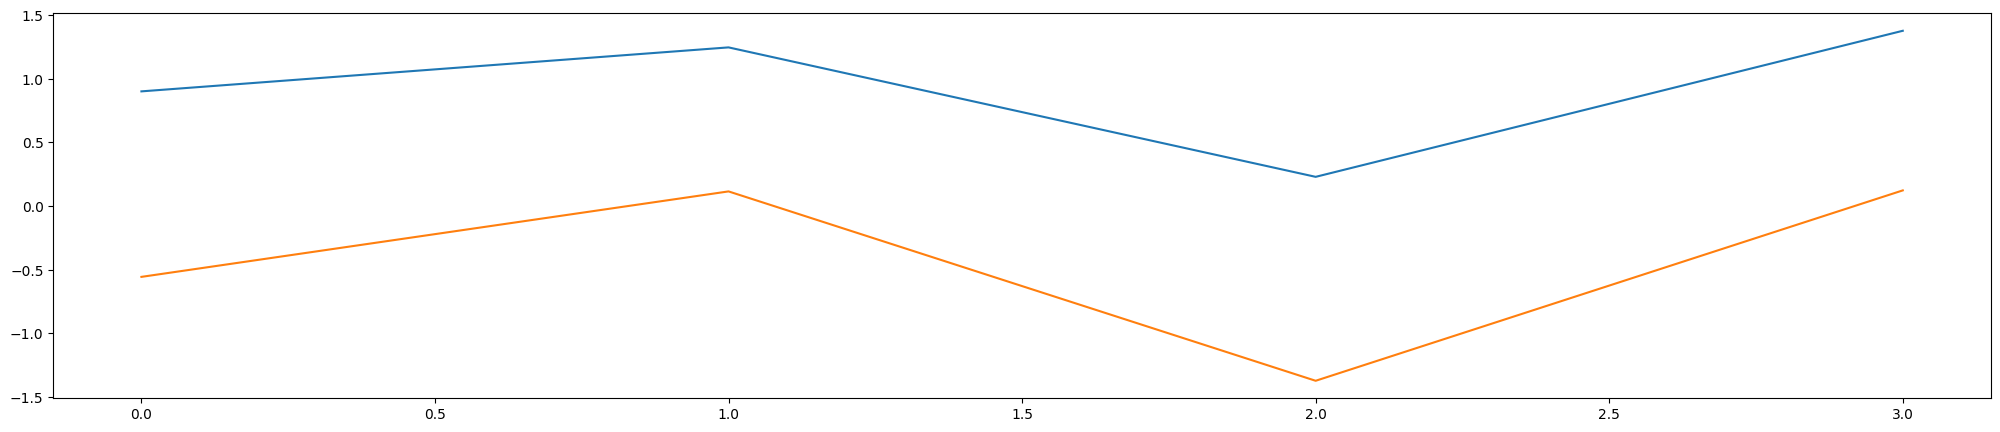

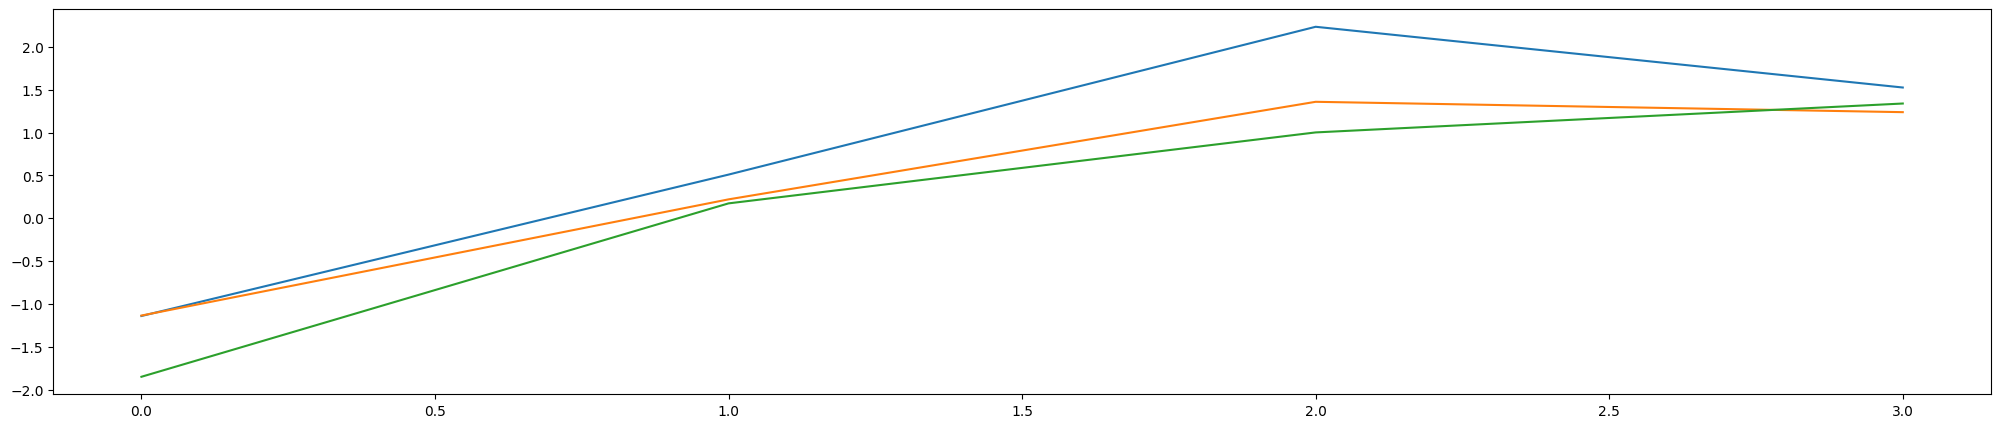

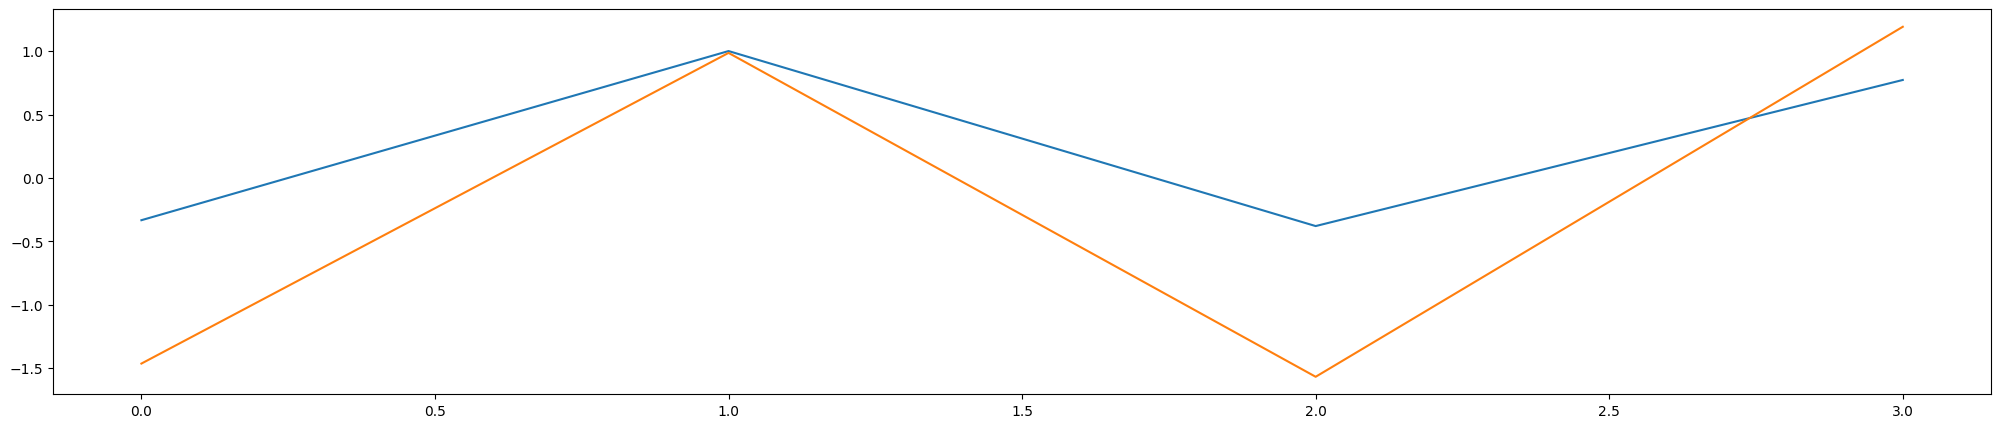

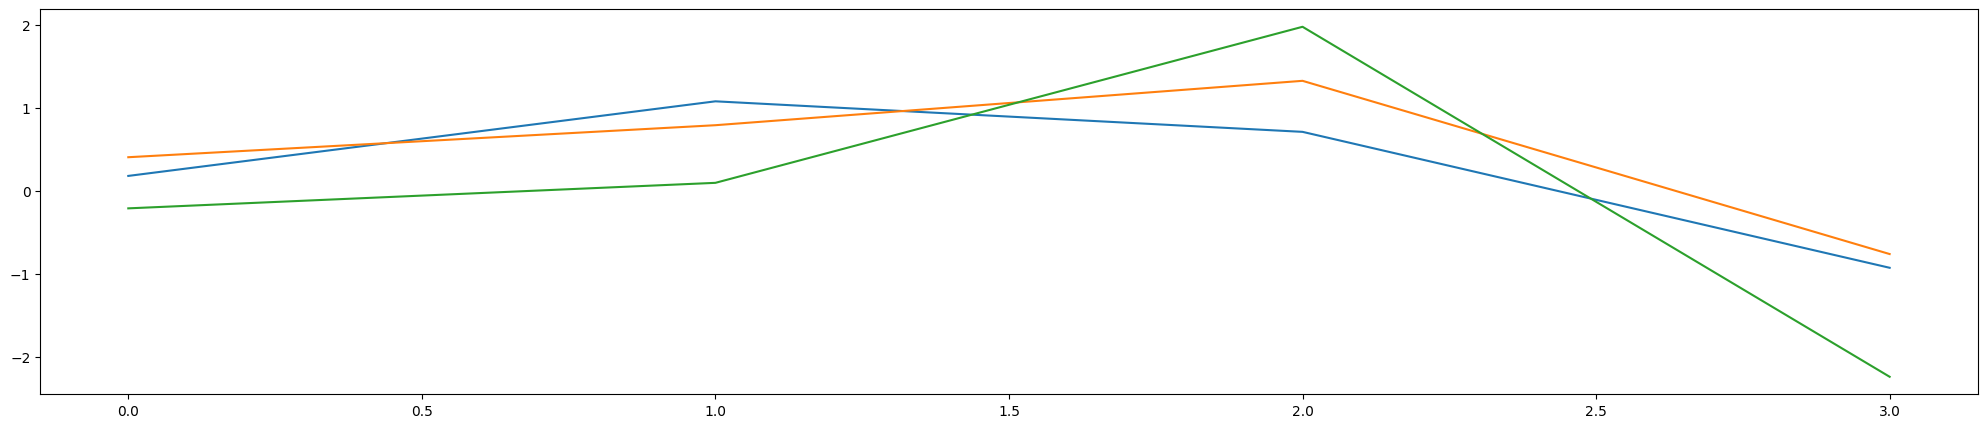

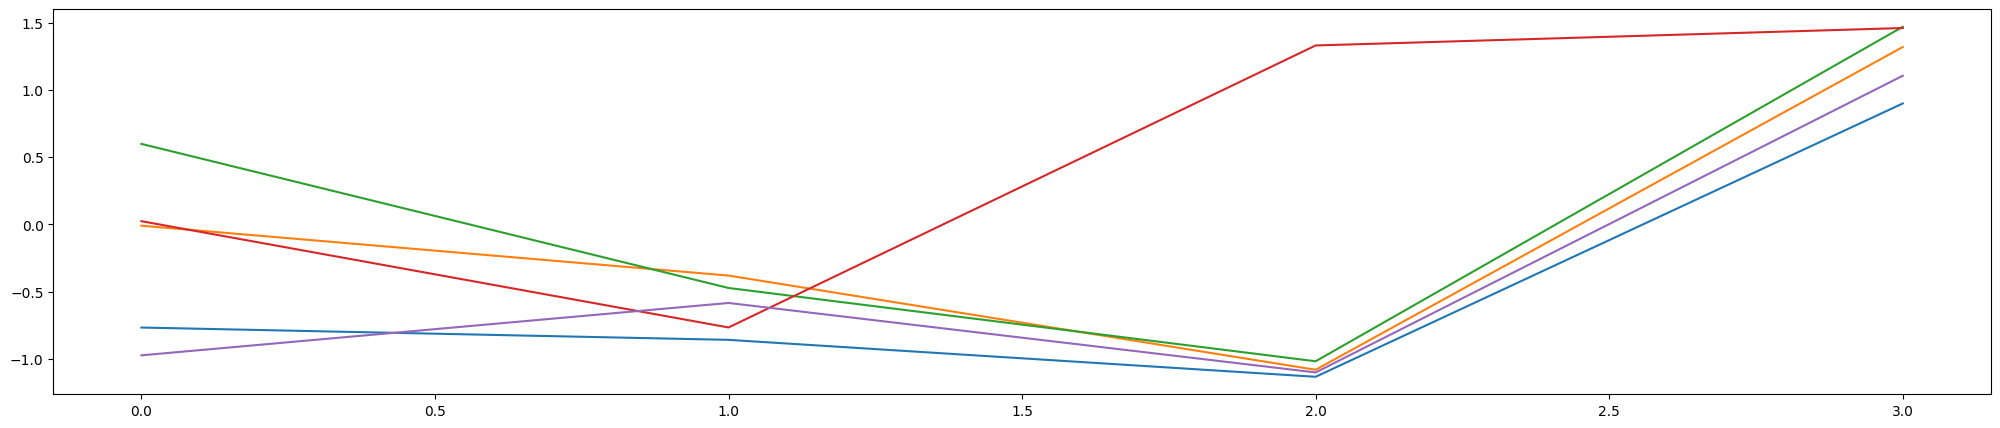

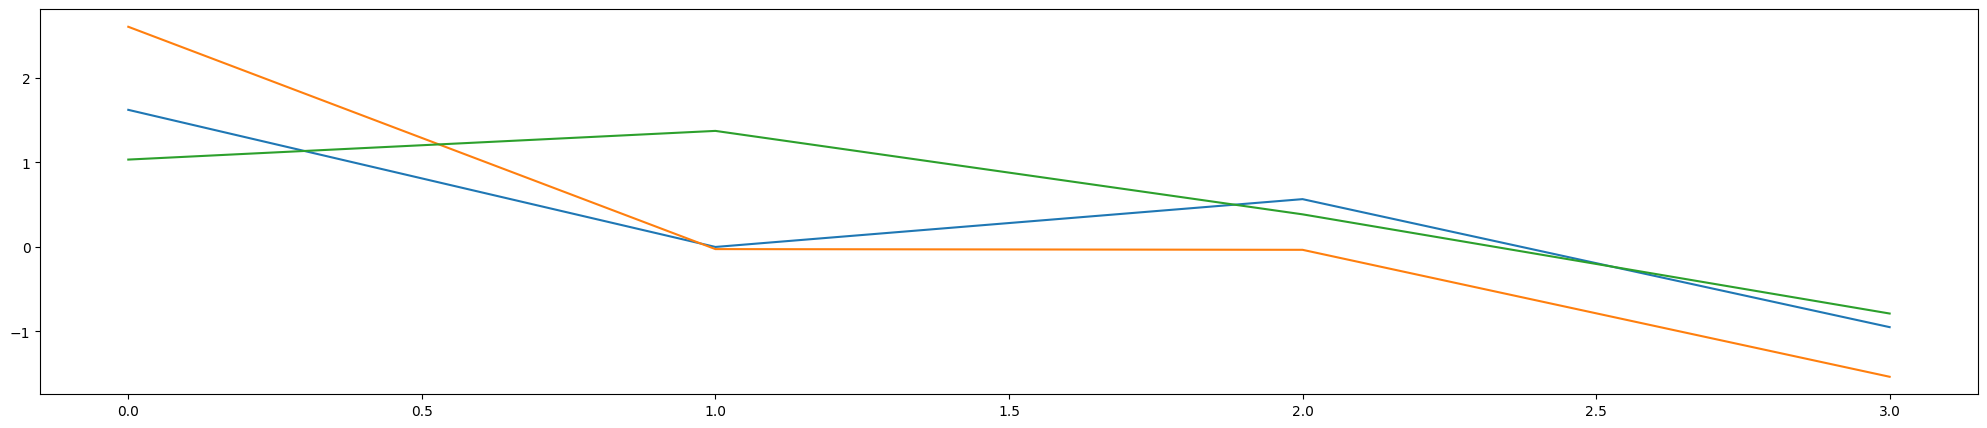

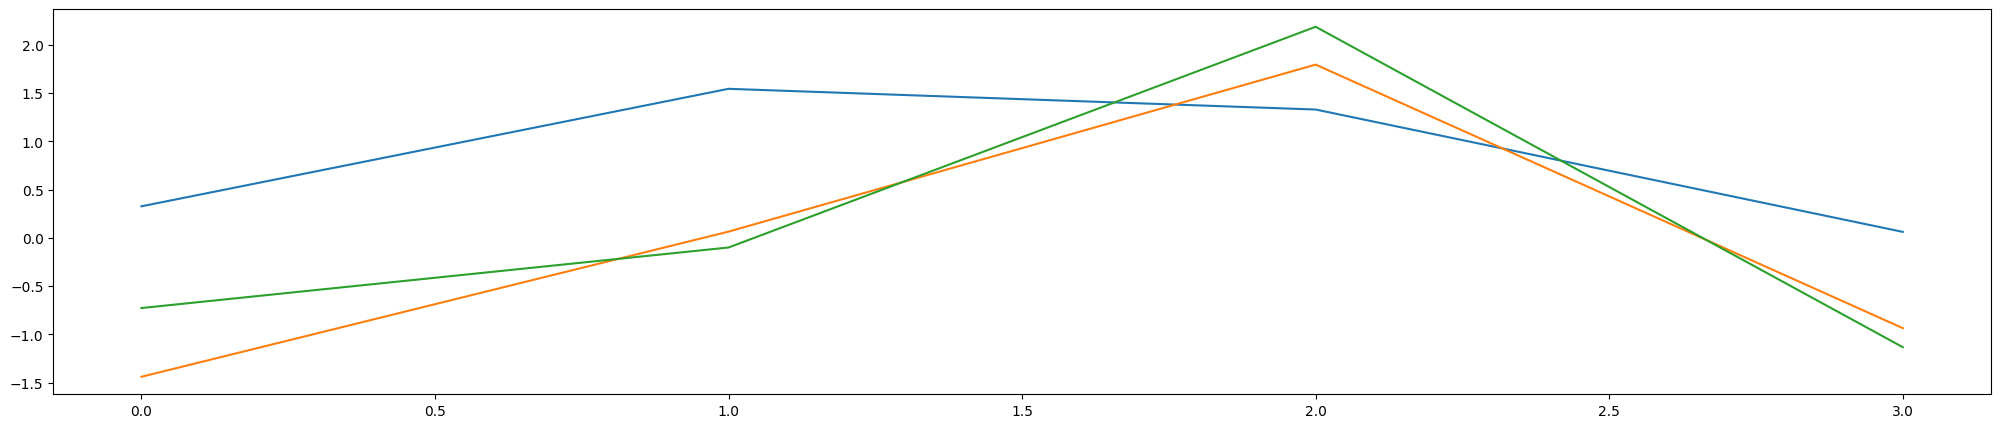

<Figure size 2500x500 with 0 Axes>

In [8]:
# Plot the merged time series for DTW
for value in time_series_indices_result:
	if len(value) < 2:
		# Skip single time series (not merged)
		continue
	for sub_value in value:
		# Plot each merged time series
		plt.plot(time_series_data[sub_value, :])
	plt.show()  # Display the plot
	plt.clf()  # Clear the plot for the next iteration

# Spearman Correlation

No scaling is necessary here because Spearman correlation is rank-based.

In [9]:
# Compute Spearman correlation-based distance matrix and obtain merged time series indices
distance_matrix, time_series_indices = compute_spearman_distance_matrix(time_series_data)

In [10]:
time_series_indices_result = merge_time_series(distance_matrix, time_series_indices, number_of_clusters, aggregation='mean')
time_series_indices_result = flatten_indices(time_series_indices_result)

Merging Process: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 7992.96it/s]


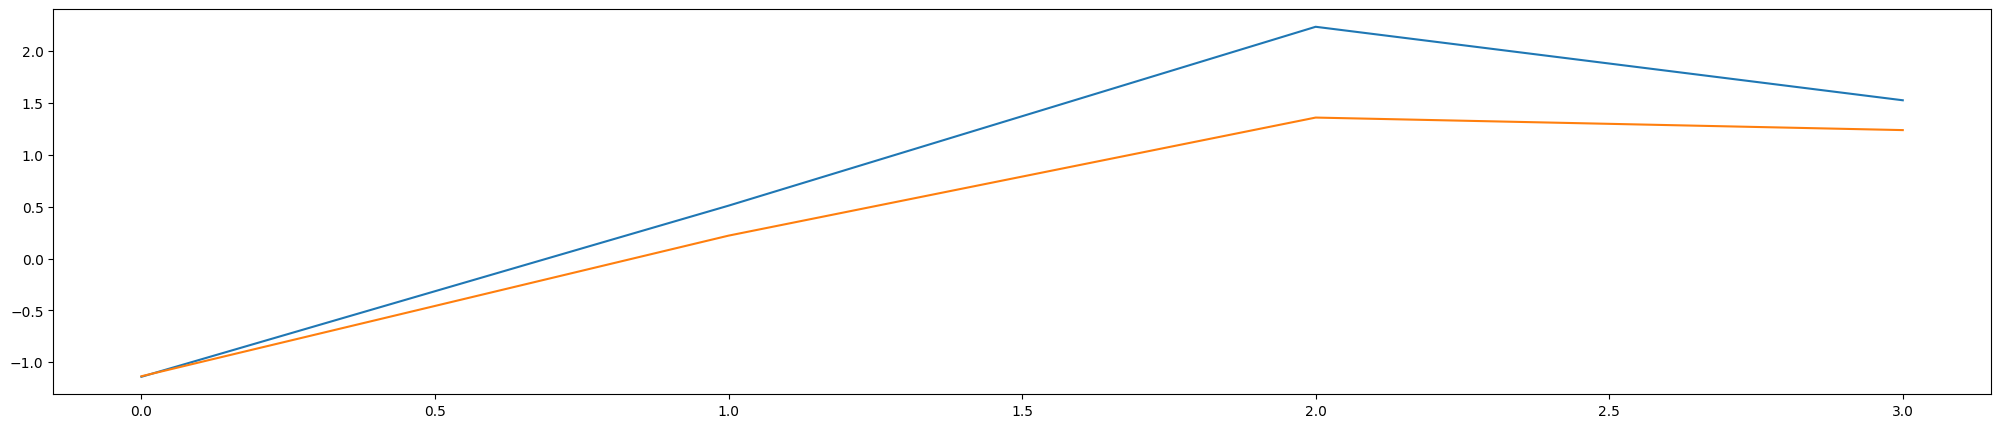

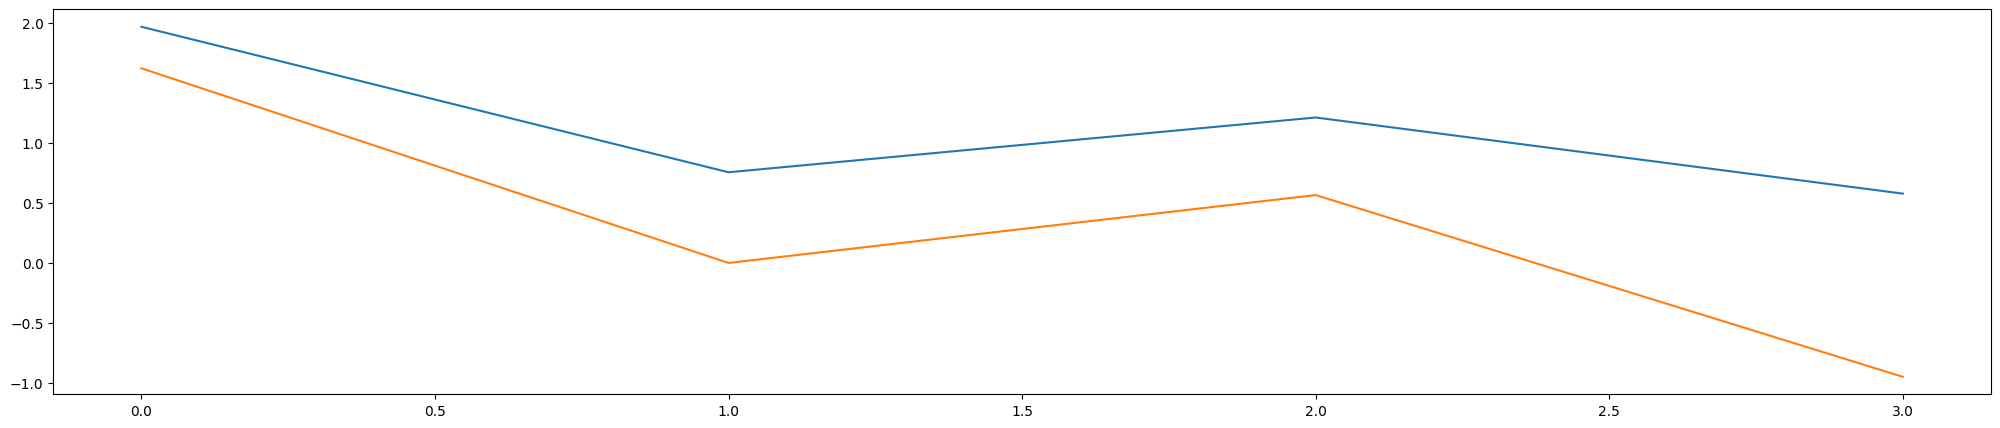

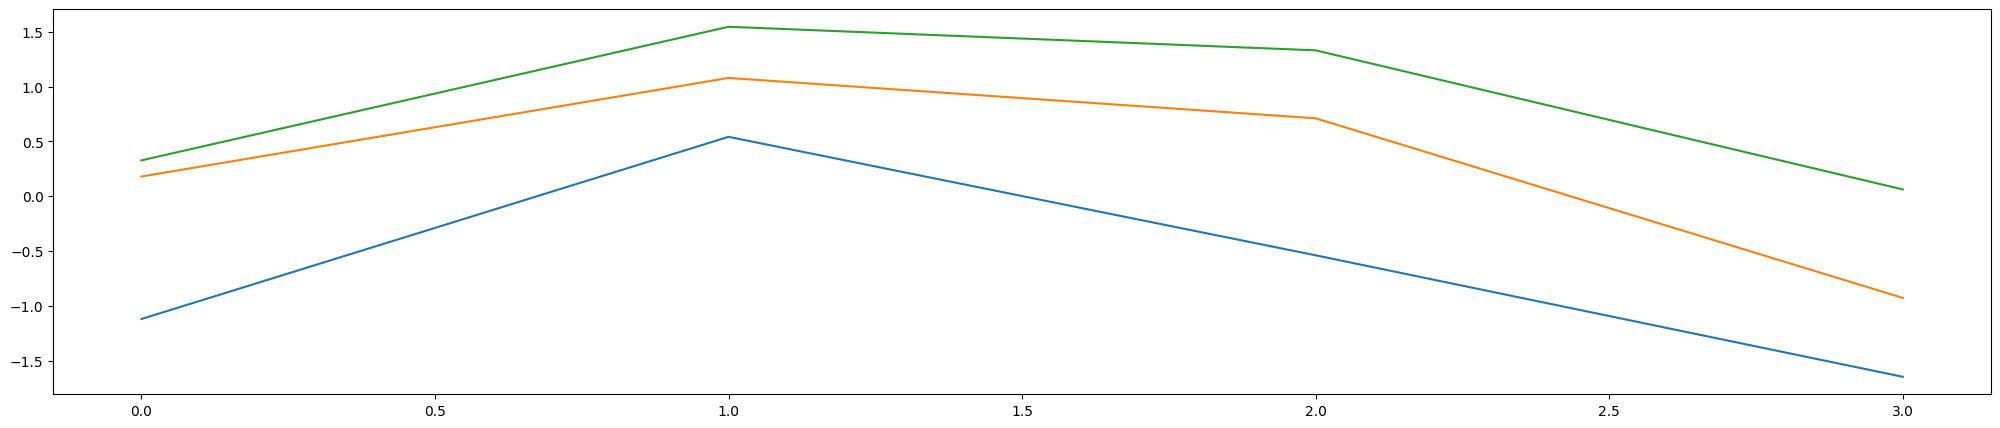

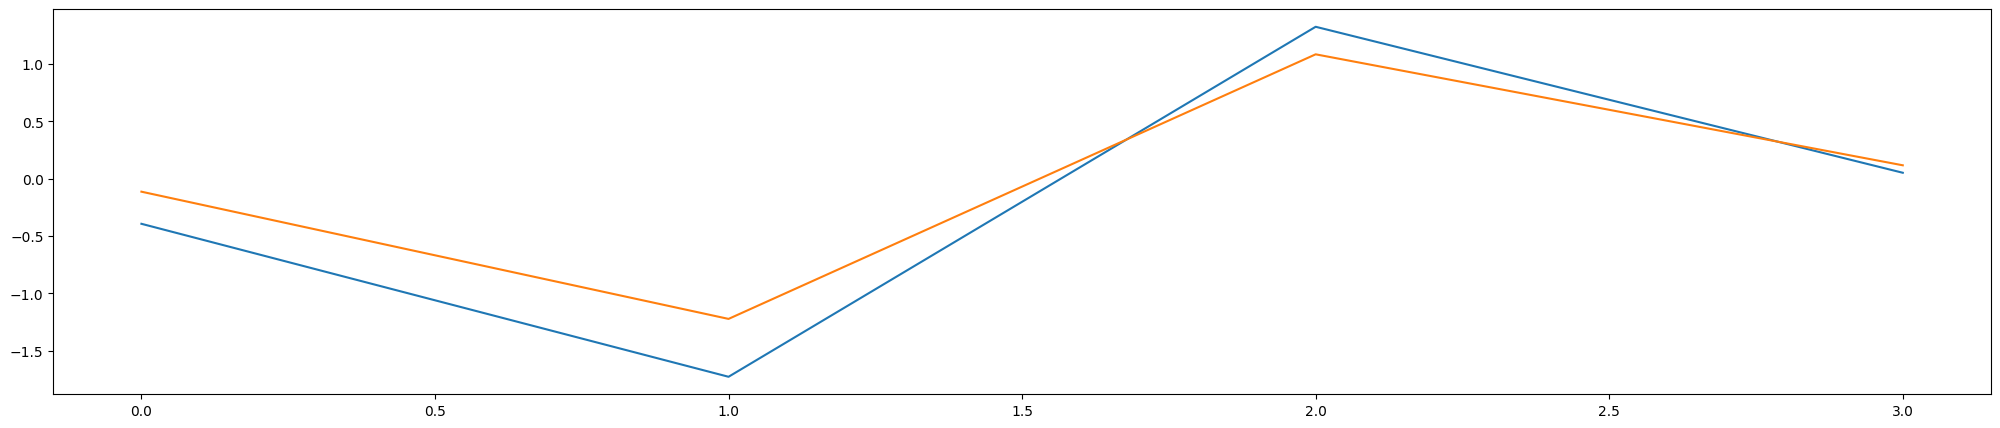

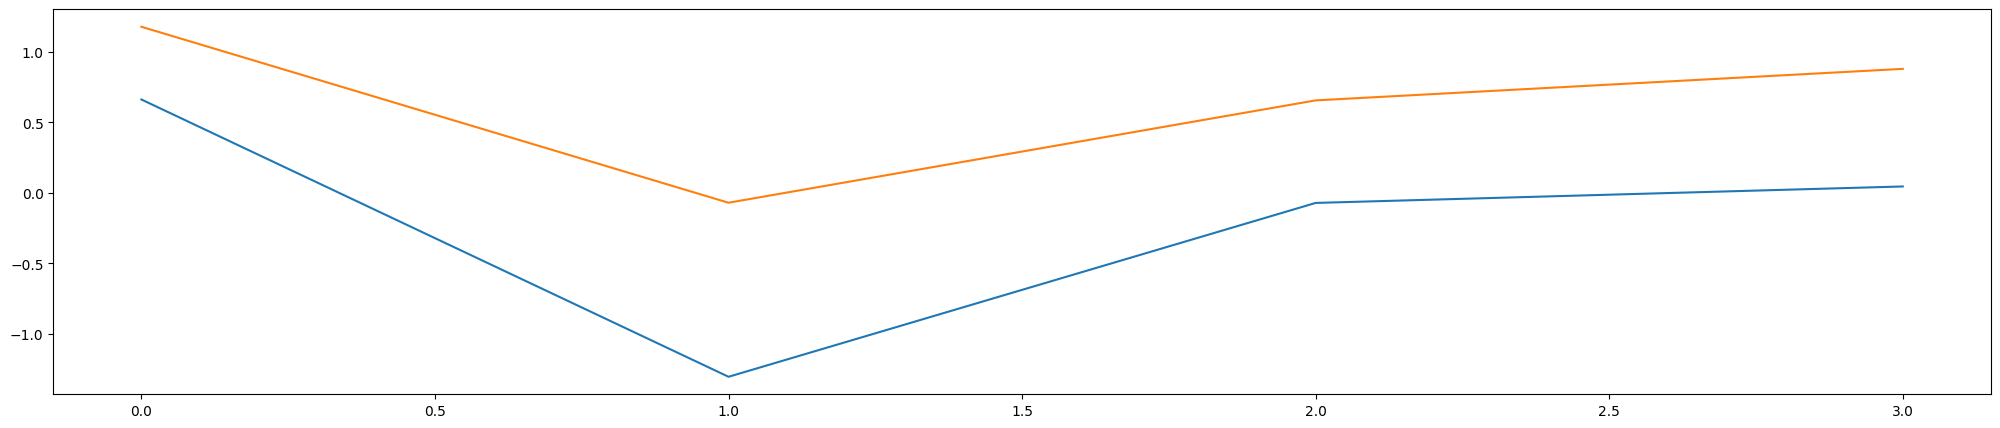

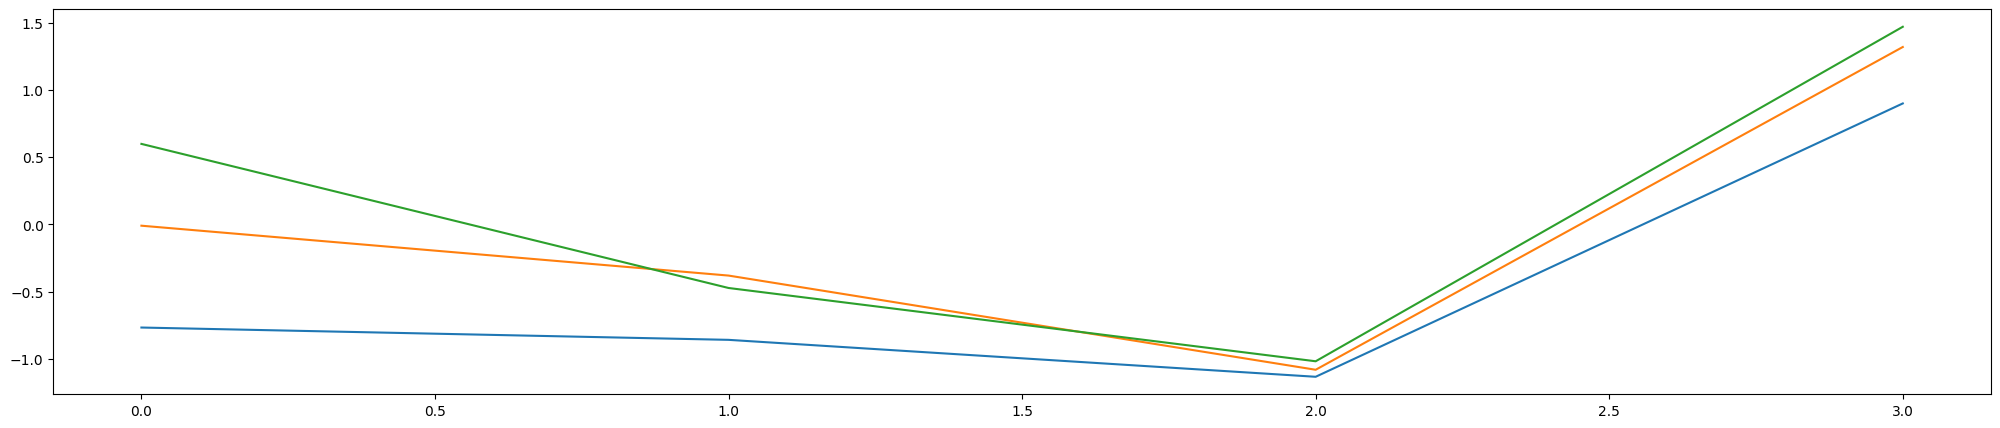

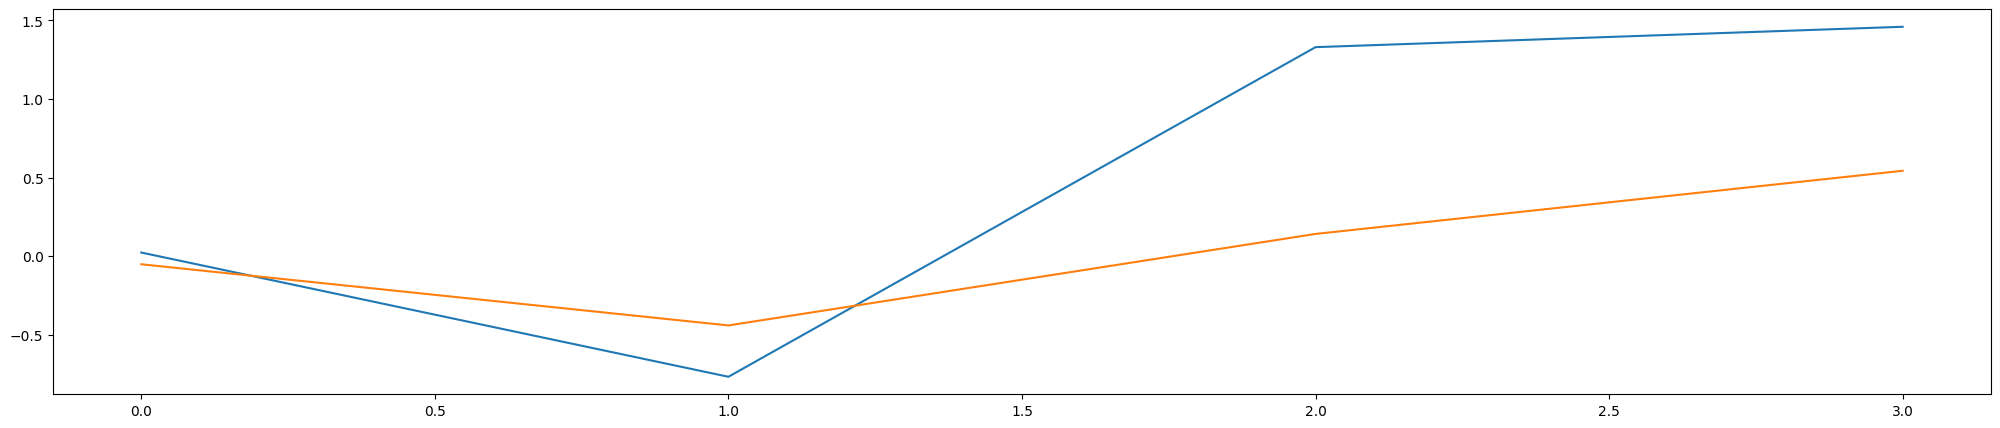

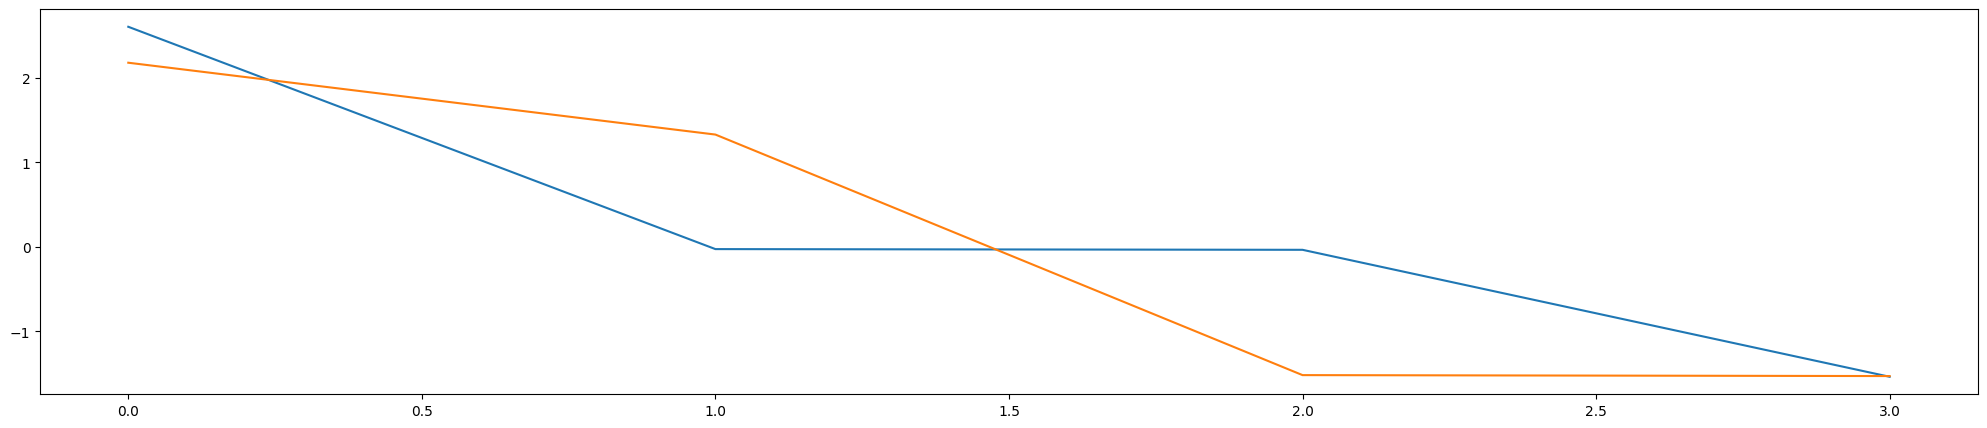

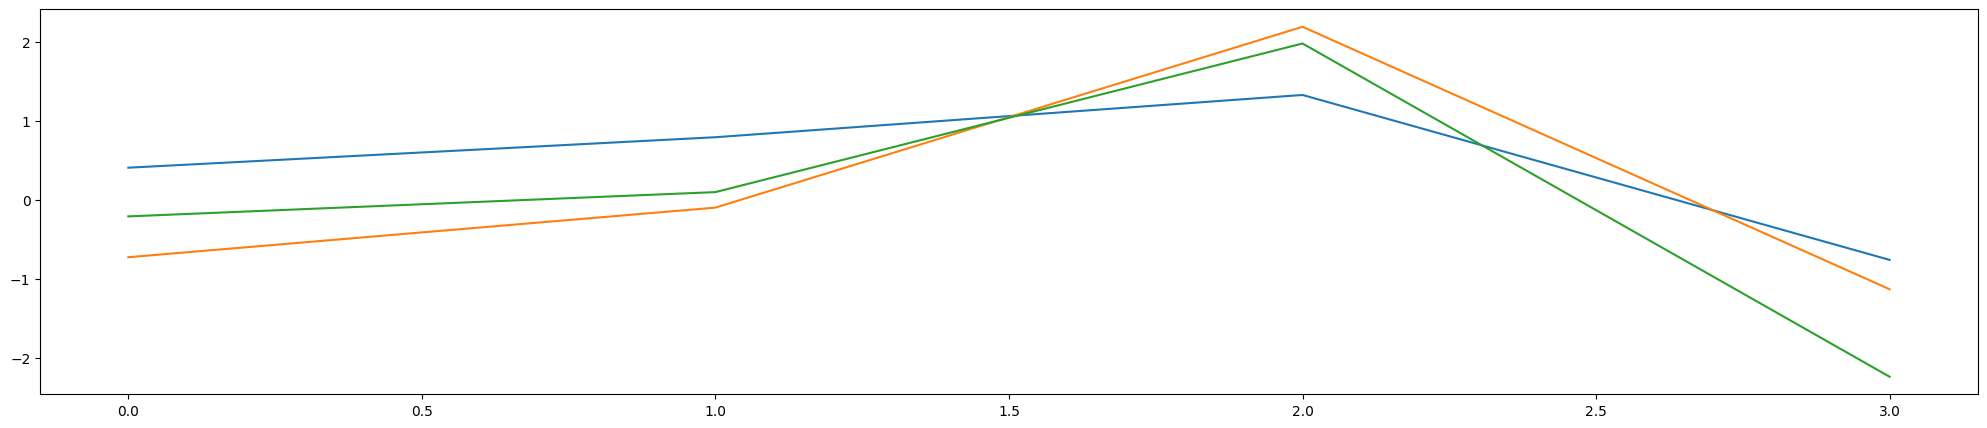

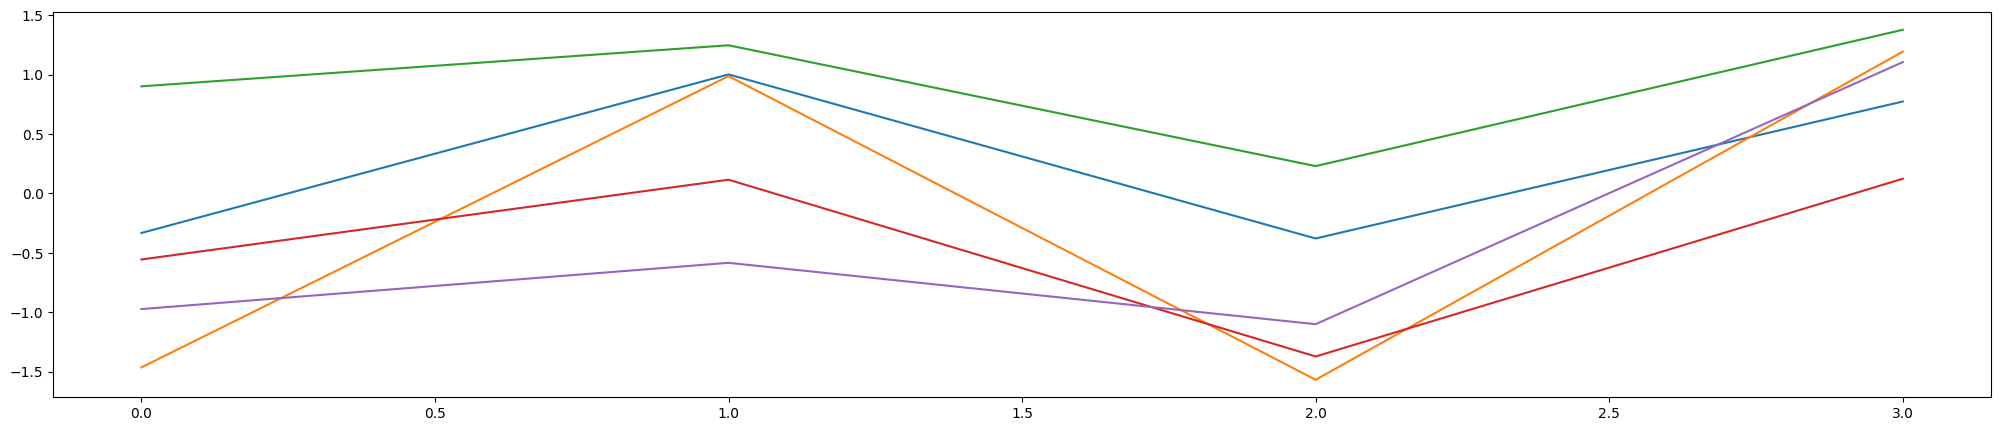

<Figure size 2500x500 with 0 Axes>

In [11]:
# Plot the merged time series for Spearman Correlation
for value in time_series_indices_result:
	if len(value) < 2:
		# Skip single time series (not merged)
		continue
	for sub_value in value:
		# Plot each merged time series
		plt.plot(time_series_data[sub_value, :])
	plt.show()  # Display the plot
	plt.clf()  # Clear the plot for the next iteration